# TP 5 : Schémas d'ordre élevé
  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercice 1 : Schémas de Taylor explicite

L'objectif de cet exercice est de construire des schémas de Taylor pour approximer la solution du problème de Cauchy 

$$
\begin{cases}
y^{\prime}(t)=f(t,y), & t>0,\\
y(0)=1.
\end{cases}
$$
Pour ce TP on prendra 
$$f(t,y)=\frac{y}{3}-\frac{ty^4}{6},\qquad y(0)= 1.$$ 

Dans ce cas, nous avons une expression explicite de (l'unique) solution $y$ sur $\mathbb{R}^+$ :

$$y(t)=\frac{1}{\left(3/2\exp(-t)+(t-1)/2\right)^{1/3}},\qquad \forall t\geq 0.$$

Nous utiliserons cette expression explicite pour comparer les solutions approchées trouvées par la suite.


#### Usage de Sympy :

Sympy est un package Python permettant de manipuler des expressions dites symboliques. Nous allons définir $f$ avec une expression symbolique, ce qui va nous permettre de faire des opérations sur $f$ qu'on ne pourrait pas faire avec une fonction classique définie par $\texttt{def [...] return [...]}$. Par exemple, on pourra différencier $f$, l'intégrer, ou même chercher les solutions (exactes !) d'équations impliquant $f$.

Si le package Sympy n'est pas installé, il vous faudra préalablement l'installer en rentrant la ligne de commande $\texttt{pip install sympy}$. Voici la syntaxe pour utiliser Sympy :

In [2]:
import sympy as sp
from sympy.abc import t,y,h   # Mettez bien "sympy" et non "sp"
# t,y,h sont alors réservés. NE PAS les réutiliser comme noms de variables !

f=y/3-t*y**4/6    # f est une expression symbolique (et non une fonction)

fy=sp.diff(f,y)     # calcule la dérivée de f selon la variable y
ft=sp.diff(f,t)
print(fy)
print(ft)

sp.solveset(f,t) # Résout l'équation f(t,y)=0 en cherchant t comme une fonction de y


-2*t*y**3/3 + 1/3
-y**4/6


{2/y**3}

Pour transformer une expression symbolique en une fonction classique, on utilise la fonction $\texttt{sp}.\texttt{lambdify}$, en précisant les variables qui sont utilisées dans l'expression symbolique.

In [3]:
flam = sp.lambdify( [t,y] , f )           # Préciser les variables de l'expression f entre [ ]
print('flam(1,2) =',flam(1,2))
print('flam(1,3) =',flam(1,3))
print('')

fnum = sp.lambdify( [t,y] , f , "numpy")    # Grâce à "numpy", fnum peut prendre des tableaux numpy en arguments

print('[fnum(1,2) fnum(1,3)] =', fnum( np.array([1,1]) , np.array([2,3]) ))

flam(1,2) = -2.0
flam(1,3) = -12.5

[fnum(1,2) fnum(1,3)] = [ -2.  -12.5]


#### Construction du schéma de Taylor

La fonction $f(t,y)$ étant donnée, on définit la suite de fonctions $(f^k)_{k\geq 0}$ par la récurrence suivante :

$$
\begin{cases}
f^{0}(t,y)=f(t,y)\\
f^{k+1}(t,y)=\frac{\partial f^{k}}{\partial t}(t,y)+ f(t,y) \times\frac{\partial f^{k}}{\partial y}(t,y)
\end{cases}
$$

Avec un pas de temps $h>0$ constant, le schéma de Taylor à l'ordre $p\geq 1$ s'écrit 

$$
\boxed{y_{n+1}=y_{n}+F(t_n,y_n,h),\qquad F(t_n,y_n,h)=\sum_{k=1}^{p}\frac{h^{k}}{k!}f^{k-1}(t_{n},y_{n})}
$$

Par exemple, pour $p=1$, on retrouve le schéma d'Euler explicite. Pour la fonction $f$ de l'énoncé, on peut montrer que le schéma de Taylor est convergent pour tout $p$. On s'intéresse à l'ordre de convergence selon la valeur de $p$.

$\textbf{a)}$ Construire une fonction $\texttt{DER(f,k)}$ qui prend en argument une expression $f=f(t,y)$ et un entier $k\geq 0$ et qui renvoie $f^{k}$ en fonction des symboles $t$ et $y$. Calculer $f^{1},\,f^{2}$ et $f^{3}$ dans le cas $f(t,y)=\frac{y}{3}-\frac{ty^4}{6}$. Remarquez l'intérêt d'un ordinateur. Essayer de simplifier l'expression de $g^{(3)}$ avec la commande $\texttt{sp}.\texttt{simplify}$. 

In [5]:
def DER(f,k):         
    f_k = f
    for i in range(k):
        f_k = sp.diff(f_k, t) + sp.diff(f_k, y)*f
    return f_k

In [6]:
print('f^1=',DER(f,1))
print('')
print('f^2=',DER(f,2))
print('')
print('f^3=',DER(f,3))
print('')


print('Simplification de f^3=',sp.simplify(DER(f,3)))

f^1= -y**4/6 + (-2*t*y**3/3 + 1/3)*(-t*y**4/6 + y/3)

f^2= -y**4*(-2*t*y**3/3 + 1/3)/6 - 2*y**3*(-t*y**4/6 + y/3)/3 + (-t*y**4/6 + y/3)*(-2*t*y**2*(-t*y**4/6 + y/3) - 2*y**3/3 + (-2*t*y**3/3 + 1/3)**2)

f^3= 2*y**7/9 - y**4*(-2*t*y**2*(-t*y**4/6 + y/3) - 2*y**3/3 + (-2*t*y**3/3 + 1/3)**2)/6 + (-t*y**4/6 + y/3)*(t*y**6/3 - 4*y**3*(-2*t*y**3/3 + 1/3)/3 - 2*y**2*(-t*y**4/6 + y/3)) + (-t*y**4/6 + y/3)*(t*y**6/3 - 4*y**3*(-2*t*y**3/3 + 1/3)/3 - 2*y**2*(-t*y**4/6 + y/3) + (-2*t*y**3/3 + 1/3)*(-2*t*y**2*(-t*y**4/6 + y/3) - 2*y**3/3 + (-2*t*y**3/3 + 1/3)**2) + (-t*y**4/6 + y/3)*(-6*t*y**2*(-2*t*y**3/3 + 1/3) - 4*t*y*(-t*y**4/6 + y/3) - 2*y**2))

Simplification de f^3= y*(35*t**4*y**12 - 154*t**3*y**9 - 126*t**2*y**9 + 210*t**2*y**6 + 324*t*y**6 - 85*t*y**3 + 54*y**6 - 171*y**3 + 2)/162


Attention au coût en temps de $\texttt{sp}.\texttt{simplify}$, qui peut être plus pénalisant que le coût en mémoire de l'expression non simplifiée. Nous conseillons de l'utiliser que si l'expression à simplifier est utilisée de nombreuses fois par la suite.

$\textbf{b)}$ Construire une fonction $\texttt{TAYLOR(f,p)}$ qui prend en argument une expression $f$, un entier $p$ et retourne l'expression $F(t,y,h)$ du schéma de Taylor d'ordre $p$.

In [9]:
def TAYLOR(f,p):
    res = 0
    for k in range(1, p+1):
        res += h**k/np.math.factorial(k)*DER(f, k-1)
        
    return res

In [10]:
g=TAYLOR(f,1)
print(g)      # affiche h*(-t*y**4/6 + y/3) : c'est en fait h*f(t,y) car quand p=1, Taylor = Euler Explicite

h*(-t*y**4/6 + y/3)


$\textbf{c)}$ Construire une fonction $\texttt{TSCHEMA(f,T,N,y0,p)}$ qui prend en argument une expression $f$, un réel $T>0$, un entier $N>0$, un réel y0 et un entier $p\geq1$, qui réalise le schéma explicite de Taylor $y_0=\text{y0}$, $y_{n+1}=y_n+F(t_n,y_n,h)$, $1\leq n\leq N$, où $h=T/N$ et $t_n=nh$.

La fonction $\texttt{TSCHEMA}$ doit retourner le vecteur des temps $t_n$ et le vecteur des $y_n$ pour $0\leq n \leq N$.

In [12]:
def TSCHEMA(f,T,N,y0,p):
    pas=T/N                   # ne pas utiliser y,t,h qui sont déjà pris comme symboles
    tn = np.linspace(0, T, N+1)
    yn = [y0]
    
    F = TAYLOR(f, p)
    F = sp.lambdify([t, y, h], F)
    
    for i in range(N):
        yn.append(yn[i] + F(tn[i], yn[i], pas))
        
    return tn, yn

$\textbf{d)}$ Tracer cinq graphes affichant à chaque fois le graphe de la solution $y$, ainsi que la courbe du schéma de Taylor approximant $y$ pour $T=10$, $N=10$ et $p$ allant de $1$ à $5$.

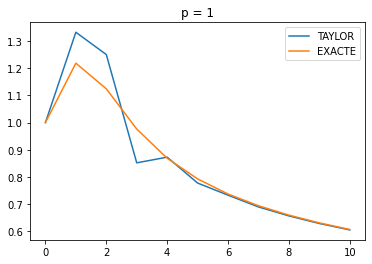

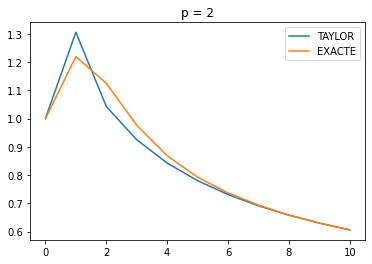

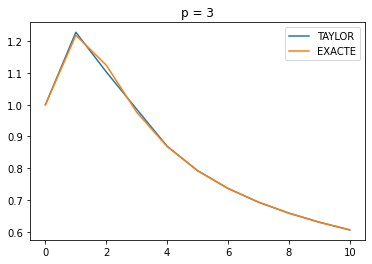

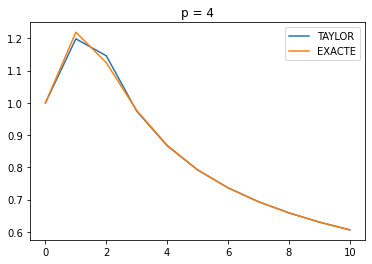

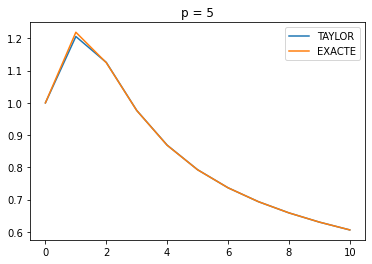

In [16]:
for p in range(1, 6):
    tn, yn = TSCHEMA(f, 10, 10, 1, p)
    plt.plot(tn ,yn)
    yexac = 1/( 3/2*np.exp(-tn) + tn/2-1/2 )**(1/3)
    plt.plot(tn, yexac)
    plt.legend(['TAYLOR', 'EXACTE'])
    plt.title('p = '+str(p))
    plt.show()


$\textbf{e)}$ Pour $T=10$, pour chaque $p\in\{1,2,3,4\}$, et pour chaque $N\in\{16,32,64,\dots,1024\}$,
calculer l'erreur $e_{p,N}=\max_{0\leq n\leq N}|y_{n}-y(t_{n})|$
où $y$ est la solution exacte. Pour chaque $p\in\{1,2,3,4\}$, tracer
$\log(e_{p,N})$ en fonction de $\log N$. Que dire de l'ordre de
convergence en fonction de $p$ ?

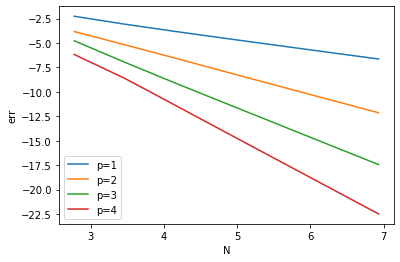

In [22]:
for p in [1,2,3,4]:
    err = []
    for N in [16,32,64,128,256,512,1024]:
        tn,yn = TSCHEMA(f,10,N,1,p)
        yexac = 1/( 3/2*np.exp(-tn) + tn/2-1/2 )**(1/3)
        err.append(np.max(np.abs(yn - yexac)))
    
    plt.plot(np.log([16,32,64,128,256,512,1024]), np.log(err), label='p='+str(p))

plt.legend()
plt.xlabel('N')
plt.ylabel('err')
plt.show()

### Exercice 2. Méthode de Runge Kutta explicite

Reprenons le problème de Cauchy donné en Exercice 1,

$$
\left\lbrace\begin{aligned}y'(t)&=\frac{y}{3}-\frac{ty^4}{6}\\y(0)&=1\end{aligned}\right.
$$

Nous rappelons qu'un schéma de Runge-Kutta *explicite* peut être défini à partir de son tableau de Butcher

$$
\begin{array}{c|cccc}
c_{1} & 0 & & \large{0}\\
c_{2} & a_{21} & 0 & \\
\vdots & \vdots & \ddots & \ddots\\
c_{q} & a_{q1} & \cdots & a_{q\,q-1} & 0\\
\hline  & b_{1} & \cdots & b_{q\,q-1} & b_{qq}
\end{array}$$

avec les formules suivantes

$$\left\lbrace\begin{aligned}
t_{n,i}&=t_n+c_ih, & 1\leq i\leq q,\\
y_{n,i}&=y_{n}+h\sum_{j=1}^{i-1}a_{ij}f(t_{n,j},y_{n,j}), & 1\leq i\leq q,
\\
y_{n+1}&=y_{n}+h\sum_{1\leq j\leq q}b_{j}f(t_{n,j},y_{n,j}):= y_n+hF(t_n,y_n,h).
\end{aligned}\right.$$

Par exemple, le schéma d'Euler explicite correspond au schéma de Runge-Kutta avec le tableau de Butcher suivant :

$$
\begin{array}{c|c}
0 & 0\\
\hline  & 1
\end{array}\quad\Rightarrow\quad\begin{cases}
t_{n,1}=t_{n} & (=t_{n}+0\times h)\\
y_{n,1}=y_{n} & (=y_{n}+h\times0)\\
y_{n+1}=y_{n}+hf(t_{n},y_{n}) & (=y_{n}+h\times1\times f(t_{n,1},y_{n,1}))
\end{cases}
$$

#### Schéma de Runge Kutta Explicite

$\textbf{a)}$ Ecrire une fonction $\texttt{RK(f,A,b,c)}$ prenant en argument une fonction $f$ (et non une expression) dépendant de deux arguments, une matrice triangulaire inférieure $A$ avec diagonale nulle, et deux vecteurs $b$ et $c$ de même dimension, et retournant la fonction $F$ du schéma de Runge-Kutta correspondant (notez que $F$ doit être une fonction).

In [ ]:
def RK(f,A,b,c):
    q=len(b)
    def F(t0,y0,h0):     # t,y,h sont déjà pris
        ...
    return F

On rappelle le tableau de Butcher du schéma de Heun (RK2) et du schéma (RK4).

Schéma (RK2) :
$$\begin{array}{c|cc}
0&0&0\\
1&1&0\\
\hline
&1/2&1/2\end{array}$$

Schéma (RK4) :
$$\begin{array}{c|cccc}
0&0 & & \large{0} & \\
1/2&1/2&0&&\\
1/2&0&1/2&0&\\
1&0&0&1&0\\
\hline
&1/6&1/3&1/3&1/6\end{array}$$

$\textbf{b)}$ Créer des fonctions $\texttt{Euler(t,y,h)}$, $\texttt{RK2(t,y,h)}$ et $\texttt{RK4(t,y,h)}$ retournant les fonctions respectives $F$ des schémas d'Euler, de Runge-Kutta d'ordre 2 et de Runge-Kutta d'ordre 4.

In [ ]:
def f(t,y):              # Pour cet exercice, f est une fonction
    return y/3-t*y**4/6  

Euler = ...



RK2 = ...



RK4 = ...

$\textbf{c)}$  Construire une fonction $\texttt{SCHEMAEXP(F,t,N,y0)}$ qui prend en argument une fonction $F=F(t,y,h)$, un réel $T>0$, un entier $N>0$, un réel y0, qui réalise le schéma explicite $y_0=\text{y0}$, $y_{n+1}=y_n+\color{red}{h} F(t_n,y_n,h)$, $1\leq n\leq N$, où $h=T/N$ et $t_n=nh$.

La fonction $\texttt{SCHEMAEXP}$ doit retourner le vecteur des temps $t_n$ et le vecteur des $y_n$ pour $0\leq n \leq N$.

*On pourra adapter le code de la fonction* $\texttt{TSCHEMA}$ *de l'exercice précédent*.

In [ ]:
def SCHEMAEXP(F,T,N,y0):
    pas=T/N                   # ne pas utiliser y,t,h qui sont déjà pris comme symboles
    ...

$\textbf{d)}$  Etude qualitative : comparer sur un même graphique les courbes obtenues avec la solution exacte, et les trois schémas d'Euler, RK2 et RK4 sur $[0,T]=[0,10]$ et pour $N\in\{10,20,100\}$. Commenter.

$\textbf{e)}$ Etude quantitative. Pour $T=10$, pour chaque méthode (Euler, RK2, RK4), et pour chaque $N\in\{16,32,64,\dots,1024\}$, calculer l'erreur $e_{N}=\max_{0\leq n\leq N}|y_{n}-y(t_{n})|$
où $y$ est la solution exacte. Pour chaque méthode, tracer
$\log(e_{N})$ en fonction de $\log N$. Que dire de l'ordre de
convergence de chaque méthode ?

*On pourra adapter le code de la question **e)** de l'exercice précédent*.

### Exercice 3 : Runge-Kutta implicite

Les méthodes de Runge-Kutta explicites peuvent échouer sur certaines EDO trop "raides", lorsque le pas $h$ est trop grand. Pour ce type d'EDO, on privilégie alors des méthodes implicites : elles sont plus difficiles à coder et plus coûteuses en temps de calcul pour faire un pas, mais on peut prendre un pas beaucoup plus grand et la convergence sera quand même meilleure.

Dans cet exercice, on considère

$$
\begin{cases}
y^{\prime}(t)=f(t,y), & t>0,\\
y(0)=1.
\end{cases}
$$
avec
$$f(t,y)=50(t-y),\qquad y(0)= 1.$$ 

A nouveau, nous avons une expression explicite de (l'unique) solution $y$ sur $\mathbb{R}^+$ :

$$y(t)=\left(1+\frac{1}{50}\right)e^{-50t} + t -\frac{1}{50},\qquad \forall t\geq 0.$$



#### Schéma de Radau IIA

Nous proposons maintenant d'implémenter le schéma de Runge-Kutta dit de *Radau IIA* donné par le tableau de Butcher suivant :
$$\begin{array}{c|ccc}
1/3&5/12&-1/12\\
1&3/4&1/4\\
\hline
&3/4&1/4
\end{array}.$$

La matrice $A$ associée à ce tableau n'est plus triangulaire inférieure à diagonale nulle : il s'agit donc d'un schéma *implicite*. En effet, le schéma est alors défini par

$$\left\lbrace\begin{aligned}
t_{n,i}&=t_n+c_ih, & 1\leq i\leq q,\\
y_{n,i}&=y_{n}+h\sum_{1\leq j\leq q}a_{ij}f(t_{n,j},y_{n,j}), & 1\leq i\leq q,
\\
y_{n+1}&=y_{n}+h\sum_{1\leq j\leq q}b_{j}f(t_{n,j},y_{n,j}):= y_n+hF(t_n,y_n,h).
\end{aligned}\right.$$

et on voit que les $y_{n,i}$ ne sont plus explicites.

##### Usage de matrice avec Sympy :
Pour déclarer une matrice de variable symbolique Sympy $B$ à partir d'un tableau d'expressions symboliques $A$, il suffit d'utiliser la commande $\texttt{B=sp}.\texttt{Matrix([A])}$. A partir d'un vecteur $V$ de variables symboliques Sympy, on peut calculer sa matrice Jacobienne en utilisant la commande $\texttt{sp}.\texttt{Matrix}.\texttt{jacobian(V,[$x_{i_1},\ldots,x_{i_p}$])}$, où les variables entre crochets précisent les variables par rapport auxquelles on différentie. Enfin pour inverser une matrice $A$ de type sympy, on écrite simplement $\texttt{A}.\texttt{inv()}$. Remarquer que Sympy peut inverser des matrices symboliques (ce n'est en général pas conseillé car lourd en temps de calcul).

Attention, pour des matrices Sympy, la multiplication de matrices se fait en écrivant $\texttt{A*B}$, et non $\texttt{np.dot(A,B)}$. Pour des matrices de type numpy, $\texttt{A*B}$ réalise une multiplication élément par élément.

Voici un exemple de la syntaxe à utiliser : 

In [ ]:
from sympy.abc import x,y,z
V=sp.Matrix([[3*x+y**2/z],[8*z*x]])   #Introduit V comme une matrice sympy
J=sp.Matrix.jacobian(V,[x,y])
Jinv=J.inv()
print('V      =',V)
print('')
print('Jac(V) =',J)
print('')
print('Inv(Jac(V)) =',Jinv)
print('')
print('J*Inv(J)    =',Jinv*J)

**a)** A partir du tableau de Butcher, écrire l'équation satisfaite par $(y_{n,1},y_{n,2})$ en fonction de $f$, $t_n$, $y_n$ et $h$, puis trouver une fonction $G:\mathbb{R}^2\to \mathbb{R}^2$ qui dépend de $y,\,t$ et $h$, telle que $(a,b)=(y_{n,1},y_{n,2})$ si et seulement si $G(a,b)=0$.

Réponse : En notant $t=t_n$ et $y=y_n$, on doit avoir 

$$\begin{cases}
y_{n,1} & =y+h\left[\frac{5}{12}f\left(t+h/3,y_{n,1}\right)-\frac{1}{12}f\left(t+h,y_{n,2}\right)\right]\\
y_{n,2} & =y+h\left[\frac{3}{4}f\left(t+h/3,y_{n,1}\right)+\frac{1}{4}f\left(t+h,y_{n,2}\right)\right]
\end{cases}$$

soit $G(y_{n,1},y_{n,2})=0$, avec $G:\mathbb{R}^2\rightarrow\mathbb{R}^2$ définie par 

$$G(a,b)=\left(\begin{array}{c}
y-a+h\left[\frac{5}{12}f\left(t+h/3,a\right)-\frac{1}{12}f\left(t+h,b\right)\right]\\
y-b+h\left[\frac{3}{4}f\left(t+h/3,a\right)+\frac{1}{4}f\left(t+h,b\right)\right]
\end{array}\right)$$

**b)** Créer une fonction $\texttt{matG}(f)$ qui à partir d'une expression $f=f(t,y)$, retourne l'expression vectorielle (2x1) $G$ ci-dessus en fonction des symboles $a,b,t,y,h$. Puis créer une fonction $\texttt{InvJacobianG}(f)$ qui retourne l'expression de l'inverse de la matrice Jacobienne de l'expression $G$ selon les variables $(a,b)$.

Important : pour obtenir l'expression $f(t,a)$ à partir de $f=f(t,y)$, on peut utiliser $\texttt{f}.\texttt{subs(y,a)}$. La commande $\texttt{subs(y,a)}$ remplace le symbole $y$ par $a$ dans l'expression $f$. On peut de la même manière remplacer $t$ par $t+h$.

In [ ]:
from sympy.abc import a,b,y,t,h
...

**c)** Définissez l'expression $f$. Puis, avec la fonction $\texttt{sp}.\texttt{lambdify}$ vu en début d'exercice 1, transformer l'expression obtenue par $\texttt{matG(f)}$ en une fonction $G=G(a,b,t,y,h)$. De même, transformer l'expression obtenue par $\texttt{InvJacobianG(f)}$ en une fonction $invJG=invJG(a,b,t,y,h)$.

In [ ]:
f     = ...
G     = ...
invJG = ...

**d)** On rappelle l'algorithme de Newton en dimension deux : on fixe $x_0\in\mathbb{R}^2$ puis pour tout $n$, tant que $Jac[G](x_n)$ est inversible, on calcule

$$x_{n+1}=x_n-Jac[G](x_n)^{-1}G(x_n).$$

jusqu'à ce que l'erreur $\Vert G(x_n) \Vert$ en norme euclidienne (ou une autre norme de $\mathbb{R}^2$) soit plus petite que $\texttt{1e-12}$ (par exemple).

Créer une fonction $\texttt{Newton(t0,y0,h0)}$ prenant la fonction $f$ du problème et les réels $t0,y0,h0$ et retournant le zéro de la fonction $G$ définie précédemment par l'algorithme de Newton en partant du point $(y0,y0)$. On prendra pour critère d'arrêt une erreur inférieure à $\texttt{1e-12}$. 

In [ ]:
def Newton(t0,y0,h0):            # attention t,y,h sont déjà pris !
    ...

**e)** Créer une fonction $\texttt{RKRADAU(t0,y0,h0)}$ prenant en entrées les réels $t0,\,y0,\,h0$ et retournant la fonction $F(t,y,h)$ de l'algorithme de Runge-Kutta Radau IIA, défini par le tableau de Butcher donné en début d'exercice. 

Dans notre cadre, le calcul de $(y_{n,1},y_{n,2})$ se fait de manière implicite par la fonction $\texttt{Newton(t0,y0,h0)}$.

In [ ]:
def RKRADAU(t0,y0,h0):
    ...

**f)** Etude qualitative : comparer sur un même graphique la solution exacte et les courbes obtenues par les méthodes RK4 et RK-Radau IIA avec $\color{orange}{T=1}$ pour $N\in\{15,18,20\}$. Commenter.

**g)** Etude quantitative : Pour $T=1$, pour chaque méthode (RK4, RK Radau IIA), et pour chaque $N\in\{32,64,\dots,1024\}$, calculer l'erreur $e_{N}=\max_{0\leq n\leq N}|y_{n}-y(t_{n})|$
où $y$ est la solution exacte. Pour chaque méthode, tracer
$\log(e_{N})$ en fonction de $\log N$. Que dire de l'ordre de
convergence de chaque méthode ?

Avec le package $time$ et la fonction $time.time()$, déterminer le temps de calcul de chaque méthode en fonction de $N$ et tracer ce temps de calcul. Commenter.

In [ ]:
import time
...

La méthode de Radau IIA est donc d'ordre 3 (comparé à l'ordre 4 de RK4) et met par ailleurs beaucoup plus de temps lorsque $N$ est grand. Cependant, lorsque $N$ reste petit (ou lorsque la raideur est très grande, par exemple $f(t,y)=5000(t-y)$), la méthode RK4 approxime très mal la solution et Radau IIA est donc meilleure.

On peut montrer que la méthode de Gauss-Legendre (cf tableau de Butcher ci-dessous) est implicite et d'ordre 4, et donc encore meilleure que Radau IIA (pour un temps de calcul similaire).

$$
\begin{array}{c|cc}
\frac{1}{2}-\frac{\sqrt{3}}{6} & \frac{1}{4} & \frac{1}{4}-\frac{\sqrt{3}}{6}\\
\frac{1}{2}+\frac{\sqrt{3}}{6} & \frac{1}{4}+\frac{\sqrt{3}}{6} & \frac{1}{4}\\
\hline  & \frac{1}{2} & \frac{1}{2}
\end{array}$$